## REGRESSION MODEL EVALUATION

RMSE, R^2 and predicting the target variable  

17 January 2023, https://ds.codeup.com/regression/evaluate/

In [3]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from regprepare import get_auto_mpg, train_val_test

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


RMSE how far off predictions from the actual.  

R^2 how correlated prediction line is with actual values.

**Using HP to predict MPG.**

In [4]:
train, val, test = train_val_test(df, stratify = 'mpg')
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

## Establish baseline and model predictions


The baseline is the mean of the actual values.  

A basic LinearRegression model will be used to make predictions.

We want to end up with an RMSE that is _smaller_ than the baseline : This will determine the model's success. (RMSE is the prediction of error ; we want a small amount of errors.)

In [18]:
# getting mean of target variable

train['mpg'].mean()

23.503829787234046

In [16]:
# rounding and setting target variable name

baseline = round(train['mpg'].mean(), 3)

In [10]:
# create a dataframe

preds = train[['horsepower', 'mpg']]

# hp = x, mpg = y

In [17]:
# MAKE NEW COLUMN ON DF FOR BASELINE PREDICTIONS

preds['baseline_preds'] = baseline
preds.head()

,horsepower,mpg,baseline_preds
212,180.0,16.5,23.504
346,67.0,32.3,23.504
325,48.0,44.3,23.504
90,198.0,12.0,23.504
246,52.0,32.8,23.504


In [81]:
# our linear regression model

ols_model = LinearRegression()

# fitting model to train[['horsepower']], which is the x-value (simple linear regresion), 
# with 'mpg' as the y-value (target variable)

ols_model.fit(train[['horsepower']], train[['mpg']])

LinearRegression()

In [26]:
# predicting on hp after it's been fit

ols_model.predict(train[['horsepower']])



# model predictions from above line of codes with 'yhat' as variable name and append it on to df
preds['yhat'] = ols_model.predict(train[['horsepower']])

preds.head()

,horsepower,mpg,baseline_preds,yhat
212,180.0,16.5,23.504,11.058302
346,67.0,32.3,23.504,30.114463
325,48.0,44.3,23.504,33.318596
90,198.0,12.0,23.504,8.022807
246,52.0,32.8,23.504,32.644042


### Compute the residuals

Predictions minus the actual.  

In [28]:
# the residual column tells how far from the baseline we are from the actual

preds['baseline_res'] = preds['baseline_preds'] - preds['mpg'] 

preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res
212,180.0,16.5,23.504,11.058302,7.004
346,67.0,32.3,23.504,30.114463,-8.796
325,48.0,44.3,23.504,33.318596,-20.796
90,198.0,12.0,23.504,8.022807,11.504
246,52.0,32.8,23.504,32.644042,-9.296


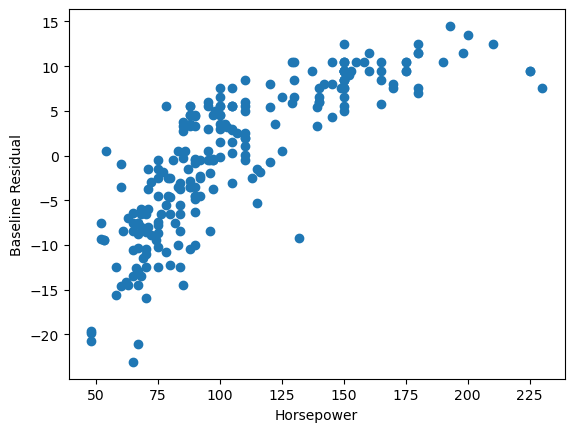

In [30]:
## make a scatter plot

plt.scatter(x = preds['horsepower'], y = preds['baseline_res'])

plt.xlabel('Horsepower')
plt.ylabel('Baseline Residual')
plt.show()

In [32]:
# looking at difference between yhat predictions and actual preds['mpg']

preds['yhat_res'] = preds['yhat'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res
212,180.0,16.5,23.504,11.058302,7.004,-5.441698
346,67.0,32.3,23.504,30.114463,-8.796,-2.185537
325,48.0,44.3,23.504,33.318596,-20.796,-10.981404
90,198.0,12.0,23.504,8.022807,11.504,-3.977193
246,52.0,32.8,23.504,32.644042,-9.296,-0.155958


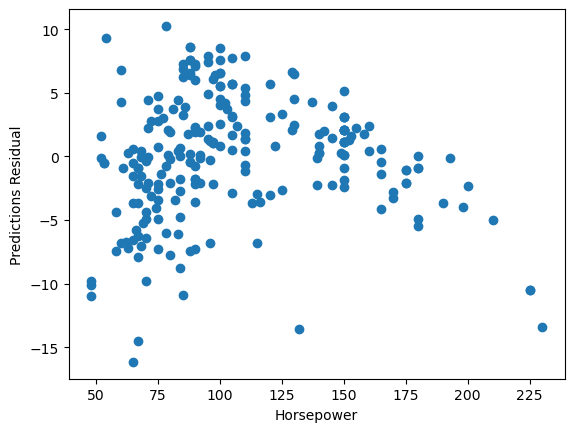

In [34]:
## make a scatter plot of the model's prediction minus the actual preditcion of mpg

plt.scatter(x = preds['horsepower'], y = preds['yhat_res'])

plt.xlabel('Horsepower')
plt.ylabel('Predictions Residual')
plt.show()

## What do with the residuals ?

Compute a metric : SSE, sum of squared errors (aka RSS, residual sum of squares).  

Find the error in the metric that we've made.  

Predicted minus actual, then it's squared and summed. (At which point it will be positively signed, because it's been squared.)

In [35]:
#look at columns

preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res'],
      dtype='object')

In [37]:
# square the columns of interest  to find baseline residuals sqaured and the yhat residuals squared

preds['baseline_res_squared'] = preds['baseline_res'] ** 2

preds['yhat_res_squared'] = preds['yhat_res'] ** 2

In [38]:
preds.head()

# shows errors between predictions and actual 

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.504,11.058302,7.004,-5.441698,49.056016,29.612081
346,67.0,32.3,23.504,30.114463,-8.796,-2.185537,77.369616,4.776574
325,48.0,44.3,23.504,33.318596,-20.796,-10.981404,432.473616,120.591236
90,198.0,12.0,23.504,8.022807,11.504,-3.977193,132.342016,15.818065
246,52.0,32.8,23.504,32.644042,-9.296,-0.155958,86.415616,0.024323


#### We're concerned with the magnitude of the error between the prediction and the error.

In [79]:
# find the total amount of error 
# first step in getting to RMSE

preds['baseline_res_squared'].sum()

15330.826560000001

In [80]:
# sum of squared error baseline
sse_baseline = preds['baseline_res_squared'].sum()

# sum of squared error yhat
sse_yhat = preds['yhat_res_squared'].sum()


# magnitude of error for baseline and for yhat
sse_baseline, sse_yhat

(15330.826560000001, 5355.469277811718)

## Compute MSE

MSE = mean of squared error.  

Divide the SSE by the total number of datapoints.  

In [43]:
# work with new variables that we've saved, not using the df anymore

sse_baseline / len(preds)

# the output number is the mean squared error for the baseline of number of entries in dataframe

65.23755982978724

In [44]:
# find the baseline MSE

mse_baseline = sse_baseline / len(preds)

In [45]:
# find the MSE of yhat

mse_yhat = sse_yhat / len(preds)
mse_yhat

# undoing the maths that we did to get to sse : this is the average of how much one prediction msises the mark.

22.789230969411566

## Compute RMSE  

RMSE = root mean squared error  

Take the square rrot of MSE.

In [47]:
# sqare root of baseline

rmse_baseline = sqrt(mse_baseline)

# sqare root of yvalue

rmse_yhat = sqrt(mse_yhat)


rmse_baseline, rmse_yhat

# shows how many miles on average that the model missed the mark

(8.076977146791195, 4.773806758700185)

## USING SKLEARN TO FIND RMSE

mean_squared_error

In [50]:
preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res', 'baseline_res_squared', 'yhat_res_squared'],
      dtype='object')

In [52]:
# finding the RMSE in one step (x = original, y = prediction)

sqrt(mean_squared_error(preds['mpg'], preds['baseline_preds']))

8.076977146791195

In [59]:
sqrt(mean_squared_error(preds['mpg'], preds['yhat']))

4.773806758700185

In [60]:
# alternate to the above line of code
# don't have to import sqrt this way : this shows the average error

mean_squared_error(preds['yhat'], preds['mpg'], squared = False)

4.773806758700185

## Model significance

Calculating the R^2 value by hand.  

R^2 = ESS / TSS.  


## ESS

ESS = explained sum of squares.  

Take predictions and subtract mean of actual values.    

Then square that and add it up.

In [61]:
# we already have a mean of actual values : 'baseline_preds'
preds.head()

# this can be used to calculate the ESS.

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.504,11.058302,7.004,-5.441698,49.056016,29.612081
346,67.0,32.3,23.504,30.114463,-8.796,-2.185537,77.369616,4.776574
325,48.0,44.3,23.504,33.318596,-20.796,-10.981404,432.473616,120.591236
90,198.0,12.0,23.504,8.022807,11.504,-3.977193,132.342016,15.818065
246,52.0,32.8,23.504,32.644042,-9.296,-0.155958,86.415616,0.024323


In [62]:
# nake new column in preds, for yhat only, because it would not results in a 0

preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
212,180.0,16.5,23.504,11.058302,7.004,-5.441698,49.056016,29.612081,-12.445698
346,67.0,32.3,23.504,30.114463,-8.796,-2.185537,77.369616,4.776574,6.610463
325,48.0,44.3,23.504,33.318596,-20.796,-10.981404,432.473616,120.591236,9.814596
90,198.0,12.0,23.504,8.022807,11.504,-3.977193,132.342016,15.818065,-15.481193
246,52.0,32.8,23.504,32.644042,-9.296,-0.155958,86.415616,0.024323,9.140042


In [64]:
# now we need to square each diffrence
# looking at differenc between predictions and baseline

preds['y_hat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,y_hat_mean_res_squared
212,180.0,16.5,23.504,11.058302,7.004,-5.441698,49.056016,29.612081,-12.445698,154.895408
346,67.0,32.3,23.504,30.114463,-8.796,-2.185537,77.369616,4.776574,6.610463,43.698216
325,48.0,44.3,23.504,33.318596,-20.796,-10.981404,432.473616,120.591236,9.814596,96.326293
90,198.0,12.0,23.504,8.022807,11.504,-3.977193,132.342016,15.818065,-15.481193,239.667338
246,52.0,32.8,23.504,32.644042,-9.296,-0.155958,86.415616,0.024323,9.140042,83.540359


In [69]:
# establishing ess baseline as 0.

ess_baseline = 0

# now on to the summing 

ess_yhat = preds['y_hat_mean_res_squared'].sum()
ess_yhat

9975.357282188277

## Compute TSS

Taking ess_yhat to compute TSS.

Total sum of squares : ESS + SSE

In [73]:
tss_baseline = sse_baseline + ess_baseline
tss_baseline

15330.826560000001

In [74]:
tss_yhat = sse_yhat + ess_yhat
tss_yhat

15330.826559999994

## Putting it all together 

Use the tss and use how much of it that we can explain to calculate the correlation coefficient

In [75]:
ess_baseline / tss_baseline

# baseline is 0. Not doing  a good job to explain the data

0.0

In [76]:
ess_yhat / tss_yhat

# r-value : We can successfully explain the data with a correlation coefficient (trend line) of about 65.1pc.

0.6506731547152981

## Use sklearn library instead

explained_variance_score()  

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html

In [77]:
explained_variance_score(preds['mpg'], preds['yhat'])

# how effevitlvey the trend line from the modelling is describing the data

0.6506731545601601